In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from scipy.stats import pearsonr
import xgboost as xgbA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.base import BaseEstimator, RegressorMixin
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, make_scorer


In [2]:
df = pd.read_csv('final_data.csv')
df['Initiation_Rate'] = np.sqrt(df['Initiation_Rate'])
df

,Gene_Name_Final,Initiation_Rate,Sd_score,Gene_length,A_nuc,C_nuc,G_nuc,T_nuc,E40w65,E40w120,...,E40w90,E40w55,E40w110,E40w105,E40w85,E40w40,E40w100,E40w115,E40w50,E40w70
0,b4637,0.103198,2,29,3,2,4,2,-11.2,-23.5,...,-14.9,-7.7,-21.2,-21.2,-11.5,-4.8,-21.2,-21.3,-7.1,-11.2
1,b4606,0.477177,4,20,1,0,3,0,-9.7,-16.9,...,-12.1,-4.5,-16.9,-16.9,-11.4,-0.6,-16.9,-16.9,-1.9,-9.7
2,b4599,0.411171,3,32,4,2,4,1,-6.2,-23.2,...,-9.1,-4.3,-21.9,-21.1,-9.1,-1.5,-15.0,-21.9,-3.7,-7.5
3,b4596,0.223041,2,58,1,2,3,0,-6.7,-28.8,...,-16.0,-4.3,-28.7,-28.7,-13.8,-3.0,-28.6,-28.8,-3.4,-8.4
4,b4550,0.363361,3,73,1,1,5,4,-5.9,-15.7,...,-10.6,-3.4,-15.7,-15.7,-10.6,-2.0,-13.5,-15.7,-2.3,-5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,b0031,0.459956,2,274,2,1,3,1,-7.1,-35.1,...,-17.6,-4.0,-31.6,-30.1,-15.1,-0.9,-30.1,-33.4,-4.0,-8.7
327,b0026,0.447220,2,939,1,3,4,3,-3.5,-25.8,...,-12.2,-3.5,-21.8,-18.1,-12.2,-2.2,-17.6,-25.5,-3.5,-3.5
328,b0014,0.456810,4,639,2,1,5,3,-7.8,-25.2,...,-16.7,-6.7,-22.5,-20.1,-11.7,0.0,-19.4,-23.4,-2.9,-8.9
329,b0008,0.638089,2,318,2,2,1,3,-2.7,-25.5,...,-11.6,-2.7,-20.2,-19.7,-8.7,-0.3,-19.7,-20.2,-2.7,-5.8


In [3]:
df.columns


Index(['Gene_Name_Final', 'Initiation_Rate', 'Sd_score', 'Gene_length',
       'A_nuc', 'C_nuc', 'G_nuc', 'T_nuc', 'E40w65', 'E40w120', 'E40w20',
       'E40w75', 'E40w35', 'E40w95', 'E40w45', 'E40w60', 'E40w80', 'E40w25',
       'E40w30', 'E40w90', 'E40w55', 'E40w110', 'E40w105', 'E40w85', 'E40w40',
       'E40w100', 'E40w115', 'E40w50', 'E40w70'],
      dtype='object')

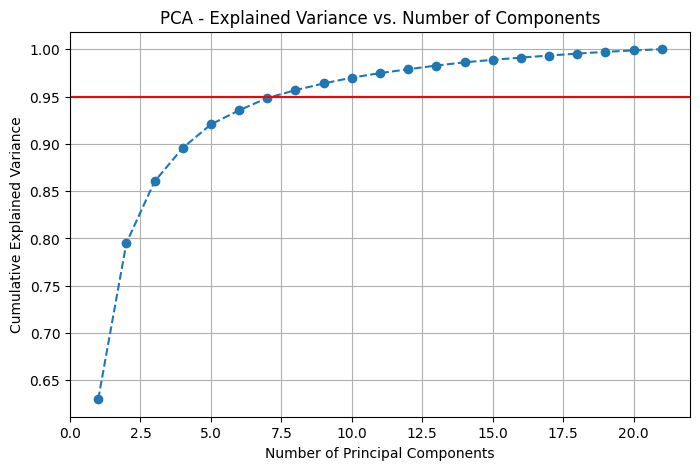

Number of components needed to explain 95% variance: 8


In [4]:


# Drop non-feature columns (target + identifier)
# features = df.drop(columns=["Gene_Name_Final", "Initiation_Rate"])
features = df[['E40w65', 'E40w120', 'E40w20',
       'E40w75', 'E40w35', 'E40w95', 'E40w45', 'E40w60', 'E40w80', 'E40w25',
       'E40w30', 'E40w90', 'E40w55', 'E40w110', 'E40w105', 'E40w85', 'E40w40',
       'E40w100', 'E40w115', 'E40w50', 'E40w70']]

# Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance vs. Number of Components")
plt.axhline(y=0.95, color='r', linestyle='-')  # 95% threshold
plt.grid(True)
plt.show()

# Find number of components required for 95% variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed to explain 95% variance: {num_components}")


In [5]:
scaler = StandardScaler()

X_base= df[['Sd_score', 'Gene_length','A_nuc', 'C_nuc']]
X_base_scaled = scaler.fit_transform(X_base)
X_base_scaled

array([[-0.3852415 , -1.29241679,  0.68283755,  0.14491223],
       [ 1.31495765, -1.33822853, -1.17740301, -1.37781632],
       [ 0.46485808, -1.27714622,  1.61295783,  0.14491223],
       ...,
       [ 1.31495765,  1.81260063, -0.24728273, -0.61645204],
       [-0.3852415 ,  0.17864884, -0.24728273,  0.14491223],
       [-2.08544065, -1.32804814, -0.24728273,  2.42900507]])

In [6]:
X_energy = df[['E40w65', 'E40w120', 'E40w20',
       'E40w75', 'E40w35', 'E40w95', 'E40w45', 'E40w60', 'E40w80', 'E40w25',
       'E40w30', 'E40w90', 'E40w55', 'E40w110', 'E40w105', 'E40w85', 'E40w40',
       'E40w100', 'E40w115', 'E40w50', 'E40w70']]

X_energy_scaled = scaler.fit_transform(X_energy)

# Apply PCA with 12 components
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_energy_scaled)
X_pca


array([[ 0.70683119, -0.03741937, -1.39673015, ...,  0.29278043,
         0.38238753,  0.22671387],
       [-3.04767013, -0.74772669, -1.51956663, ...,  0.20580611,
         0.19000312, -0.41217771],
       [-3.10744785, -0.74216673,  0.04733883, ..., -0.44991021,
         0.15465474, -0.38636058],
       ...,
       [-1.40807917, -2.06952969, -0.72310532, ...,  0.02718395,
        -0.10827747,  0.10842499],
       [-4.13028826, -1.90151947,  0.89102797, ..., -0.41714265,
        -0.08056798,  0.3653764 ],
       [-7.77587923,  0.51466736,  1.08050932, ..., -0.56782095,
         0.17281835, -0.26376996]])

In [7]:
X_pca.shape


(331, 12)

In [8]:
X = np.hstack((X_base_scaled,X_pca))
X.shape


(331, 16)

In [9]:

y  = df['Initiation_Rate']


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.15,random_state = 42,shuffle = True)
X_train.shape

(281, 16)

In [11]:
# Custom XGBoost Regressor Wrapper for GridCV
class CustomXGBRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.1, max_depth=5, n_estimators=100, seed=42):
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.n_estimators = n_estimators
        self.seed = seed

    def fit(self, X, y):
        dtrain = xgb.DMatrix(X, label=y)
        params = {
            'objective': 'reg:squarederror',
            'learning_rate': self.learning_rate,
            'max_depth': self.max_depth,
            'seed': self.seed
        }
        self.model = xgb.train(
            params,
            dtrain,
            num_boost_round=self.n_estimators,
            obj=custom_weighted_loss
        )
        return self

    def predict(self, X):
        dtest = xgb.DMatrix(X)
        return self.model.predict(dtest)

# Custom loss function
def custom_weighted_loss(preds, dtrain):
    labels = dtrain.get_label()
    errors = preds - labels
    weights = np.maximum(labels, 1)  # Larger weights for larger actual values
    grad = 2 * weights * errors
    hess = 2 * weights
    return grad, hess
# Custom scoring function
def custom_scorer(y_true, y_pred):
    return -mean_absolute_error(y_true, y_pred)  # Negative MAE for scoring

custom_score = make_scorer(custom_scorer)



In [13]:
# RandomForest Regressor
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 7],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_pearson = pearsonr(y_test, rf_pred)[0]
print(f"RandomForest TEST Pearson Coefficient: {rf_pearson}")

rf_pred_train = rf_best.predict(X_train)
rf_train_pearson = pearsonr(y_train,rf_pred_train)[0]
print(f"RandomForest TRAIN Pearson Coefficient: {rf_train_pearson}")


# GradientBoosting Regressor
gbr_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.005, 0.02, 0.1, 0.2],
    'max_depth': [3, 4, 5, 7]
}
gbr_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gbr_params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
gbr_grid.fit(X_train, y_train)
gbr_best = gbr_grid.best_estimator_
gbr_pred = gbr_best.predict(X_test)
gbr_pearson = pearsonr(y_test, gbr_pred)[0]
print(f"GradientBoosting Pearson Coefficient: {gbr_pearson}")
gbr_pred_train = gbr_best.predict(X_train)
gbr_train_pearson = pearsonr(y_train,gbr_pred_train)[0]
print(f"gradient TRAIN Pearson Coefficient: {gbr_train_pearson}")



# SVR
svr_params = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'gamma': ['scale', 'auto']
}
svr_grid = GridSearchCV(SVR(kernel='rbf'), svr_params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
svr_grid.fit(X_train, y_train)
svr_best = svr_grid.best_estimator_
svr_pred = svr_best.predict(X_test)
svr_pearson = pearsonr(y_test, svr_pred)[0]
print(f"SVR Pearson Coefficient: {svr_pearson}")
svr_pred_train = svr_best.predict(X_train)
svr_train_pearson = pearsonr(y_train,svr_pred_train)[0]
print(f"SVR TRAIN Pearson Coefficient: {svr_train_pearson}")


# Parameter grid
param_grid = {
    'learning_rate': [0.002,0.005,0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}
# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:pseudohubererror', random_state=42)
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_
xgb_pred = xgb_best.predict(X_test)
xgb_pearson = pearsonr(y_test, xgb_pred)[0]
print(f"XGBoost Pearson Coefficient: {xgb_pearson}")
xgb_pred_train = xgb_best.predict(X_train)
xgb_train_pearson = pearsonr(y_train,xgb_pred_train)[0]
print(f"xgb TRAIN Pearson Coefficient: {xgb_train_pearson}")



RandomForest TEST Pearson Coefficient: 0.6970662113933075
RandomForest TRAIN Pearson Coefficient: 0.9437082937901303
GradientBoosting Pearson Coefficient: 0.7075554047170463
gradient TRAIN Pearson Coefficient: 0.7325438487092633
SVR Pearson Coefficient: 0.5579023121035224
SVR TRAIN Pearson Coefficient: 0.6492908623791327
XGBoost Pearson Coefficient: 0.7573302416715018
xgb TRAIN Pearson Coefficient: 0.7807398188774229


In [ ]:
#for PCA 8

    # RandomForest TEST Pearson Coefficient: 0.7018340978146288
    # RandomForest TRAIN Pearson Coefficient: 0.8441868792881405
    # GradientBoosting Pearson Coefficient: 0.714424912176151
    # gradient TRAIN Pearson Coefficient: 0.7203116662993487
    # SVR Pearson Coefficient: 0.5589179693041345
    # SVR TRAIN Pearson Coefficient: 0.688061859623477
    # XGBoost Pearson Coefficient: 0.7503018555941067
    # xgb TRAIN Pearson Coefficient: 0.7582304033752015                                  // IMPORTANT
    # Best parameters: {'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 300}
    # XGboost Pearson Correlation: 0.7493510619872847
    # cxgb TRAIN Pearson Coefficient: 0.7487140803983776

# for PCA 9

    # RandomForest TEST Pearson Coefficient: 0.6990300659156421
    # RandomForest TRAIN Pearson Coefficient: 0.9242593402488624
    # GradientBoosting Pearson Coefficient: 0.7100168170489956
    # gradient TRAIN Pearson Coefficient: 0.7234912197216975
    # SVR Pearson Coefficient: 0.5605297891154971
    # SVR TRAIN Pearson Coefficient: 0.6764409442252675
    # XGBoost Pearson Coefficient: 0.7550708094506996
    # xgb TRAIN Pearson Coefficient: 0.7575161625295652                                   //IMPORTANT
    # Best parameters: {'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 300}
    # XGboost Pearson Correlation: 0.7535043814709346
    # cxgb TRAIN Pearson Coefficient: 0.7493858002896966
    
# for PCA 10
    # RandomForest TEST Pearson Coefficient: 0.7051337449101951
    # RandomForest TRAIN Pearson Coefficient: 0.8508824782240357
    # GradientBoosting Pearson Coefficient: 0.7124096053036593
    # gradient TRAIN Pearson Coefficient: 0.7223310409858994
    # SVR Pearson Coefficient: 0.572913471352111
    # SVR TRAIN Pearson Coefficient: 0.5801768687223009
    # XGBoost Pearson Coefficient: 0.7544266145076252
    # xgb TRAIN Pearson Coefficient: 0.7744368579521338                              // IMPORTANT
    # Best parameters: {'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 300}
    # XGboost Pearson Correlation: 0.7505045820686267
    # cxgb TRAIN Pearson Coefficient: 0.7572950798458753
    
# for PCA 11
    # RandomForest TEST Pearson Coefficient: 0.6910496405510645
    # RandomForest TRAIN Pearson Coefficient: 0.9313629089771548
    # GradientBoosting Pearson Coefficient: 0.7116530312127375
    # gradient TRAIN Pearson Coefficient: 0.7238427082822307
    # SVR Pearson Coefficient: 0.5715504631592422
    # SVR TRAIN Pearson Coefficient: 0.5806569221029442
    # XGBoost Pearson Coefficient: 0.7559146050523029
    # xgb TRAIN Pearson Coefficient: 0.774527819847165                         // IMPORTANT
    # Best parameters: {'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 300}
    # XGboost Pearson Correlation: 0.7475298497964564
    # cxgb TRAIN Pearson Coefficient: 0.757948179327366

# for pca 12
    # RandomForest TEST Pearson Coefficient: 0.6970662113933079
    # RandomForest TRAIN Pearson Coefficient: 0.9437082937901307
    # GradientBoosting Pearson Coefficient: 0.7075554047170461
    # gradient TRAIN Pearson Coefficient: 0.7325438487092628
    # SVR Pearson Coefficient: 0.5579023121035224
    # SVR TRAIN Pearson Coefficient: 0.6492908623791326
    # XGBoost Pearson Coefficient: 0.7573302416715016                       // IMPORTANT
    # xgb TRAIN Pearson Coefficient: 0.7807398188774226
    # Best parameters: {'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 300}
    # XGboost Pearson Correlation: 0.7353941222228262
    # cxgb TRAIN Pearson Coefficient: 0.7667050051985265


In [14]:
import matplotlib.pyplot as plt


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Extract grid search results
train_scores = xgb_grid.cv_results_['mean_train_score']
test_scores = xgb_grid.cv_results_['mean_test_score']
params = range(len(train_scores))  # Just for plotting

# Plot train vs. test Pearson coefficients
plt.figure(figsize=(8, 5))
plt.plot(params, train_scores, label="Train Pearson", marker='o', linestyle='--', color='b')
plt.plot(params, test_scores, label="Test Pearson", marker='s', linestyle='-', color='r')

plt.xlabel("Hyperparameter Combinations")
plt.ylabel("Pearson Coefficient")
plt.title("Train vs. Test Pearson Coefficient for XGBoost")
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'mean_train_score'

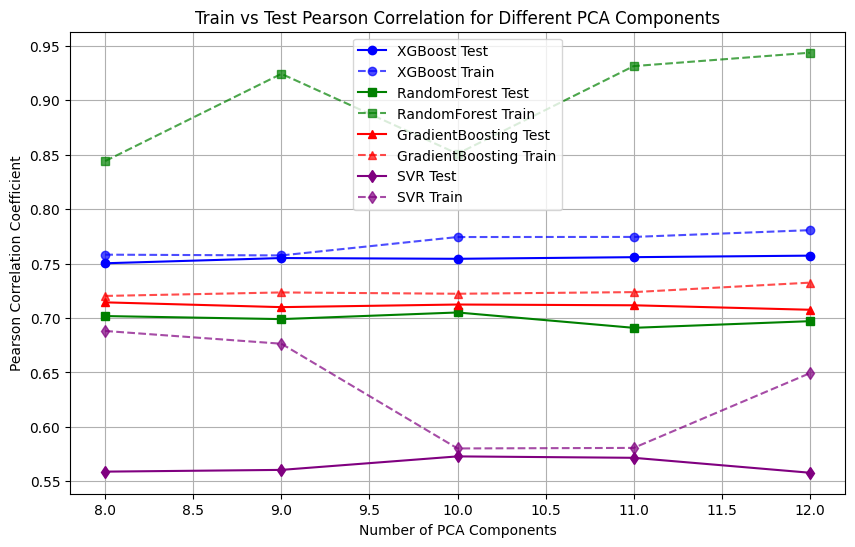

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# PCA components
pca_values = [8, 9, 10, 11, 12]

# Test Pearson Coefficients
xgb_test = [0.7503, 0.7551, 0.7544, 0.7559, 0.7573]
rf_test = [0.7018, 0.6990, 0.7051, 0.6910, 0.6971]
gbr_test = [0.7144, 0.7100, 0.7124, 0.7117, 0.7076]
svr_test = [0.5589, 0.5605, 0.5729, 0.5716, 0.5579]

# Train Pearson Coefficients
xgb_train = [0.7582, 0.7575, 0.7744, 0.7745, 0.7807]
rf_train = [0.8442, 0.9243, 0.8509, 0.9314, 0.9437]
gbr_train = [0.7203, 0.7235, 0.7223, 0.7238, 0.7325]
svr_train = [0.6881, 0.6764, 0.5802, 0.5807, 0.6493]

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(pca_values, xgb_test, marker='o', linestyle='-', label='XGBoost Test', color='blue')
plt.plot(pca_values, xgb_train, marker='o', linestyle='--', label='XGBoost Train', color='blue', alpha=0.7)

plt.plot(pca_values, rf_test, marker='s', linestyle='-', label='RandomForest Test', color='green')
plt.plot(pca_values, rf_train, marker='s', linestyle='--', label='RandomForest Train', color='green', alpha=0.7)

plt.plot(pca_values, gbr_test, marker='^', linestyle='-', label='GradientBoosting Test', color='red')
plt.plot(pca_values, gbr_train, marker='^', linestyle='--', label='GradientBoosting Train', color='red', alpha=0.7)

plt.plot(pca_values, svr_test, marker='d', linestyle='-', label='SVR Test', color='purple')
plt.plot(pca_values, svr_train, marker='d', linestyle='--', label='SVR Train', color='purple', alpha=0.7)

plt.xlabel("Number of PCA Components")
plt.ylabel("Pearson Correlation Coefficient")
plt.title("Train vs Test Pearson Correlation for Different PCA Components")
plt.legend()
plt.grid(True)
plt.show()
